1. Descriptive Statistics:
2. Distribution of Features:
Histograms: to check how features are distributed.
Boxplots: Identify potential outliers and data spread:
Pairplots:
Violinplots

4. Detecting Outliers:
Using IQR or Z-score methods (which you’ve already done).
Boxplots help in visual detection.
5. Correlation Analysis:
Check correlation between features:
df.corr() or visualize with sns.heatmap(df.corr()).
6. Class Distribution (for classification tasks):
df['nova_group'].value_counts() — Check if your classes are balanced.
7. Relationship Between Features:
Use scatter plots or pair plots to identify relationships:
sns.pairplot(df[['fat_100g', 'sugars_100g', 'nova_group']]).


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('cleaned_nova_data.csv')

In [9]:
df.sample(4)

,nutriscore,nova_group,energy,fat,saturated-fat,cholesterol,carbohydrates,sugars,fiber,proteins,salt,sodium
62031,10.0,3.0,293.0,5.000000,0.000000,0.0,10.000000,10.000000,0.000000,1.000000,2.000000,0.800000
98845,-6.0,1.0,295.0,0.000000,0.000000,0.0,14.117647,3.529412,3.529412,2.352941,0.029412,0.011765
131275,7.0,3.0,2371.0,33.333333,16.666667,0.0,63.333333,3.333333,25.000000,3.333333,0.541667,0.216667
35116,1.0,2.0,1023.0,0.000000,0.000000,0.0,48.890000,0.000000,2.220000,11.110000,1.185300,0.474120


In [10]:
end_columns = ['nutriscore', 'nova_group']
sorted_columns = sorted([col for col in df.columns if col not in end_columns])
final_columns = sorted_columns + end_columns
df=df[final_columns]

In [11]:
df.sample(10)

,carbohydrates,cholesterol,energy,fat,fiber,proteins,salt,saturated-fat,sodium,sugars,nutriscore,nova_group
125052,12.960000,0.000,226.0,0.00,0.0,0.560000,0.042500,0.000000,0.017000,10.420000,13.0,4.0
170661,71.930000,0.000,1540.0,1.75,10.5,15.790000,0.000000,0.000000,0.000000,1.750000,-6.0,1.0
24336,62.860000,0.000,1913.0,20.00,0.0,8.570000,1.016000,5.710000,0.406400,22.860000,14.0,4.0
126111,100.000000,0.000,1745.0,0.00,0.0,0.000000,0.000000,0.000000,0.000000,66.670000,14.0,4.0
104320,0.000000,0.054,523.0,0.89,0.0,28.570000,1.115000,0.000000,0.446000,0.000000,0.0,1.0
91322,75.000000,0.000,1494.0,0.89,3.6,12.500000,0.000000,0.000000,0.000000,1.790000,-4.0,1.0
136376,12.083333,0.000,209.0,0.00,0.0,0.416667,0.020833,0.000000,0.008333,10.833333,13.0,4.0
108514,27.780000,0.014,619.0,3.70,0.0,1.850000,0.105000,2.310000,0.042000,19.440000,6.0,3.0
125532,11.670000,0.000,192.0,0.00,0.0,0.000000,0.037500,4.508496,0.015000,11.670000,15.0,4.0
98897,25.000000,0.033,1100.0,13.16,1.3,13.160000,1.020000,1.970000,0.408000,1.320000,2.0,2.0


In [12]:
df.shape

(208889, 12)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208889 entries, 0 to 208888
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   carbohydrates  208889 non-null  float64
 1   cholesterol    208889 non-null  float64
 2   energy         208889 non-null  float64
 3   fat            208889 non-null  float64
 4   fiber          208889 non-null  float64
 5   proteins       208889 non-null  float64
 6   salt           208889 non-null  float64
 7   saturated-fat  208889 non-null  float64
 8   sodium         208889 non-null  float64
 9   sugars         208889 non-null  float64
 10  nutriscore     208889 non-null  float64
 11  nova_group     208889 non-null  float64
dtypes: float64(12)
memory usage: 19.1 MB


In [14]:
df.describe()

,carbohydrates,cholesterol,energy,fat,fiber,proteins,salt,saturated-fat,sodium,sugars,nutriscore,nova_group
count,208889.000000,208889.000000,208889.000000,208889.000000,208889.000000,208889.000000,2.088890e+05,208889.000000,2.088890e+05,208889.000000,208889.000000,208889.000000
mean,33.504648,0.022467,1119.553753,12.222113,2.027956,7.023526,3.864006e+08,4.508496,1.545603e+08,15.654596,9.335542,2.975599
std,35.471208,0.735939,872.326058,42.812499,4.302050,12.727551,1.750379e+11,7.073100,7.001518e+10,21.069492,8.600048,1.227764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,-15.000000,1.000000
25%,6.670000,0.000000,381.000000,0.000000,0.000000,0.240000,1.000000e-01,0.000000,4.000000e-02,1.190476,2.000000,2.000000
50%,23.000000,0.000000,1111.000000,4.690000,0.000000,4.440000,7.100000e-01,2.220000,2.840000e-01,6.000000,11.000000,4.000000
75%,60.710000,0.008000,1657.000000,19.050000,2.900000,10.000000,1.535800e+00,6.060000,6.143200e-01,22.220000,15.000000,4.000000
max,8140.000000,116.915000,125520.000000,17776.666000,700.000000,2400.000000,8.000000e+13,700.000000,3.200000e+13,1100.000000,40.000000,4.000000


2. Distribution of Features:

array([[<Axes: title={'center': 'carbohydrates'}>,
        <Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'energy'}>],
       [<Axes: title={'center': 'fat'}>,
        <Axes: title={'center': 'fiber'}>,
        <Axes: title={'center': 'proteins'}>],
       [<Axes: title={'center': 'salt'}>,
        <Axes: title={'center': 'saturated-fat'}>,
        <Axes: title={'center': 'sodium'}>],
       [<Axes: title={'center': 'sugars'}>,
        <Axes: title={'center': 'nutriscore'}>,
        <Axes: title={'center': 'nova_group'}>]], dtype=object)

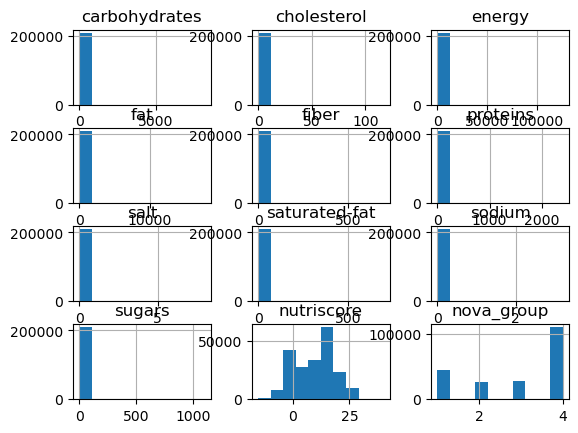

In [16]:
#Histogram
df.hist()

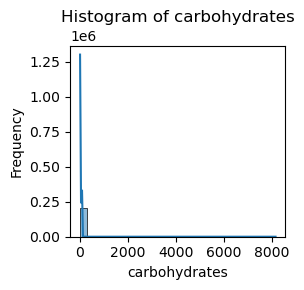

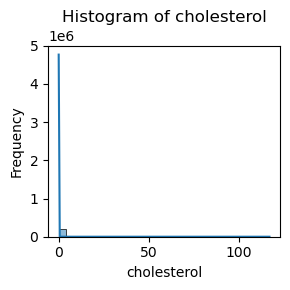

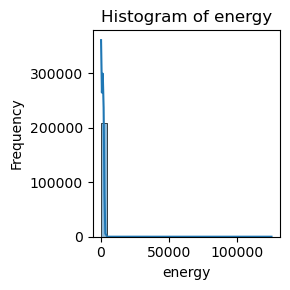

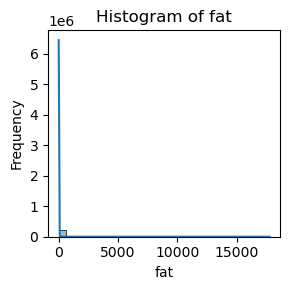

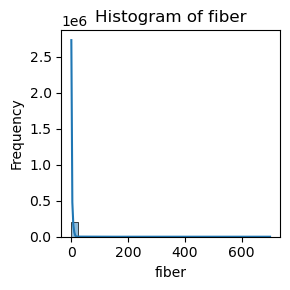

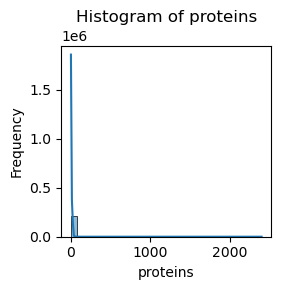

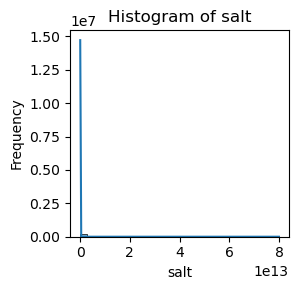

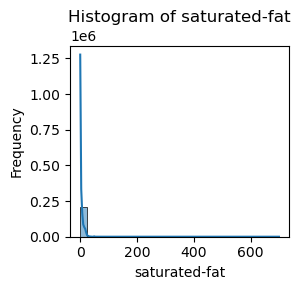

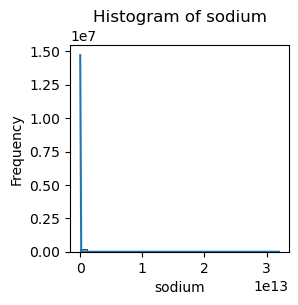

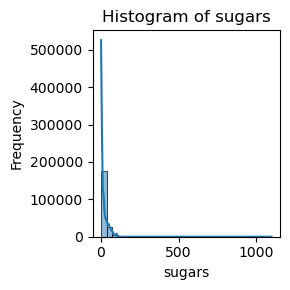

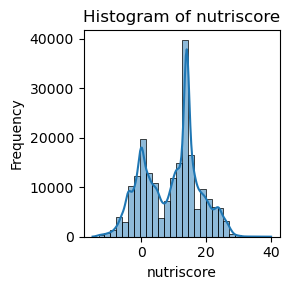

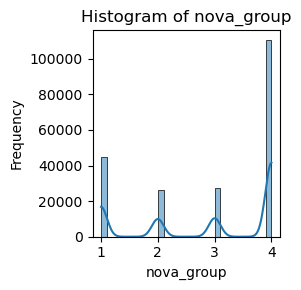

In [17]:
# sns heatmap
for col in df.columns:
    plt.figure(figsize=(3, 3))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

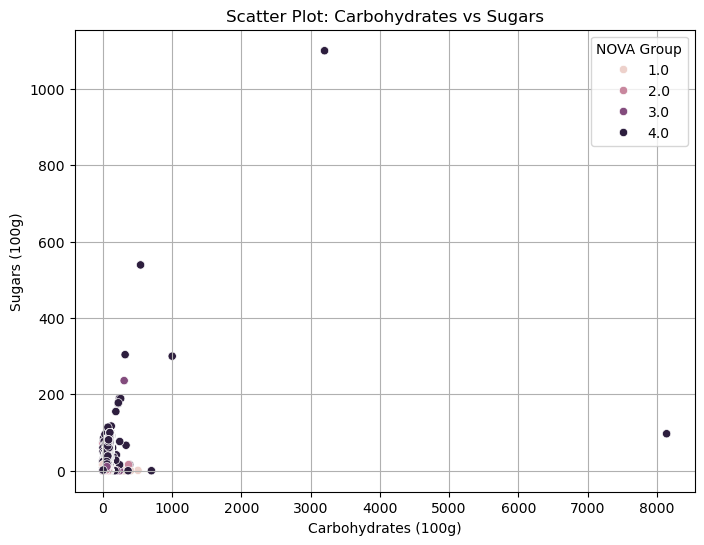

In [18]:
# scatter plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='carbohydrates', y='sugars', hue='nova_group')
plt.title('Scatter Plot: Carbohydrates vs Sugars')
plt.xlabel('Carbohydrates (100g)')
plt.ylabel('Sugars (100g)')
plt.legend(title='NOVA Group')
plt.grid(True)
plt.show()


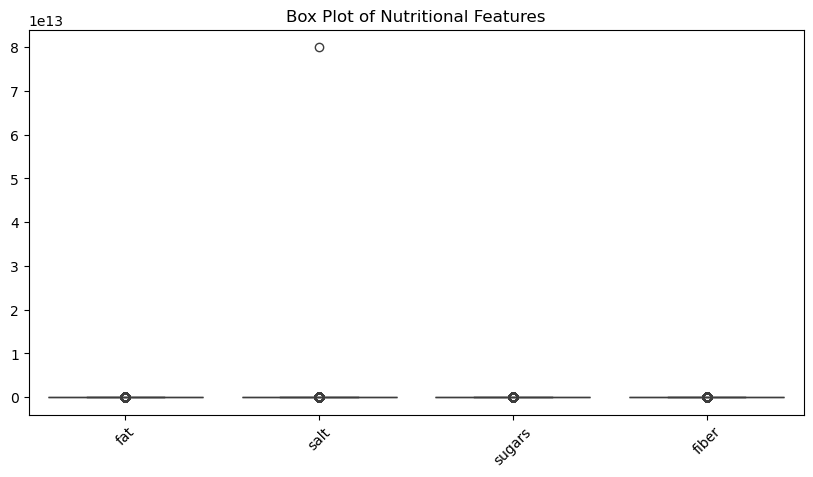

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['fat', 'salt', 'sugars', 'fiber']])
plt.xticks(rotation=45)
plt.title('Box Plot of Nutritional Features')
plt.show()


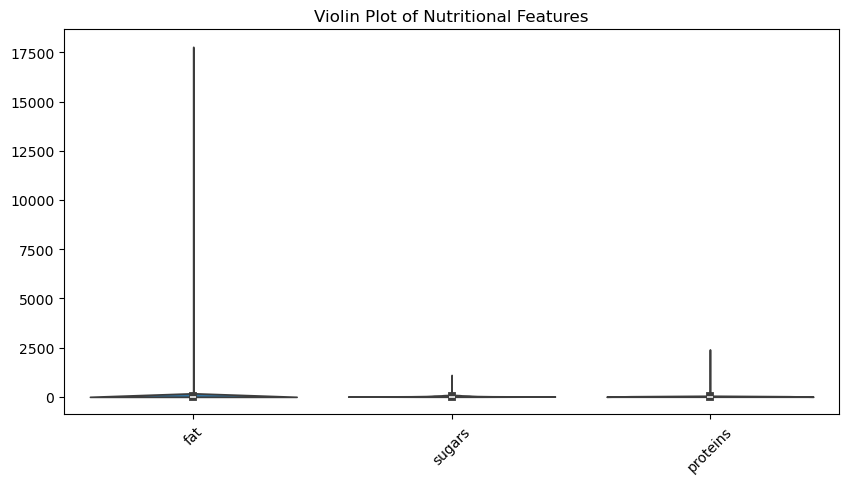

In [20]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=df[['fat', 'sugars', 'proteins']])
plt.xticks(rotation=45)
plt.title('Violin Plot of Nutritional Features')
plt.show()

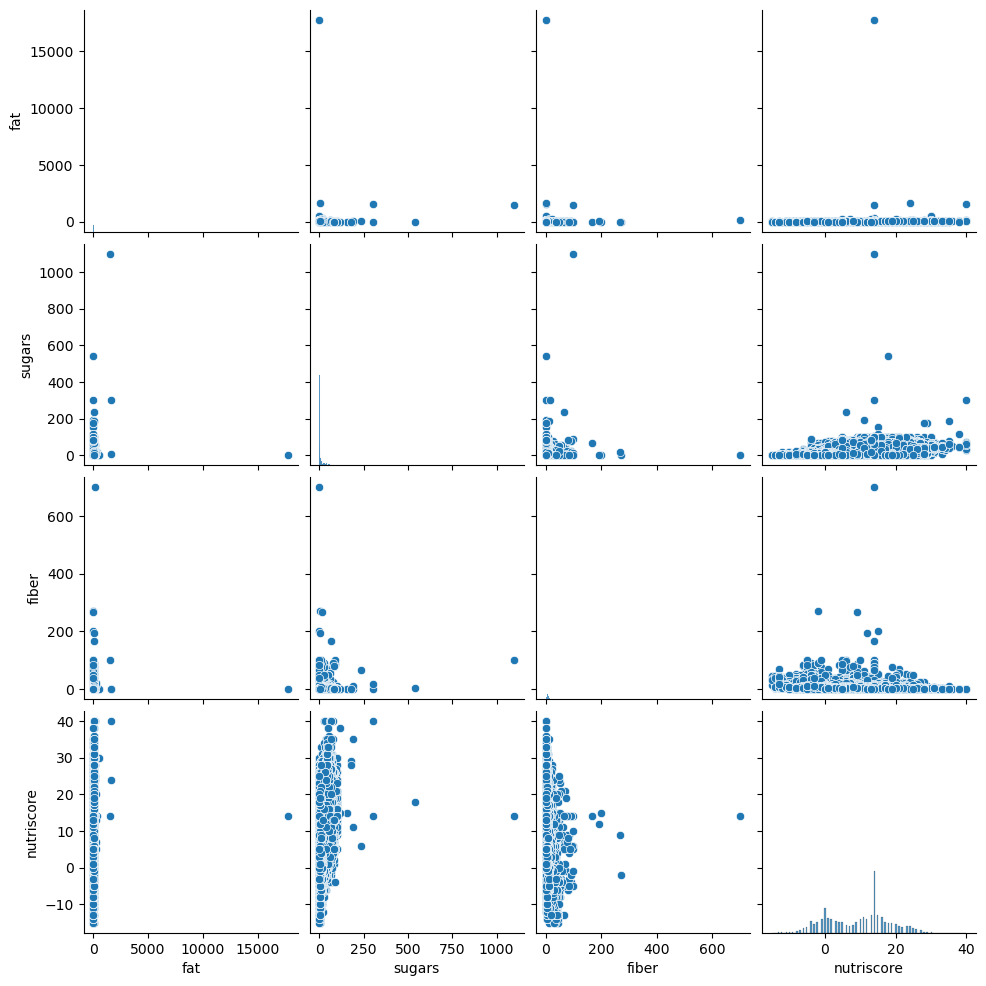

In [21]:
sns.pairplot(df[['fat', 'sugars', 'fiber', 'nutriscore']])
plt.show()


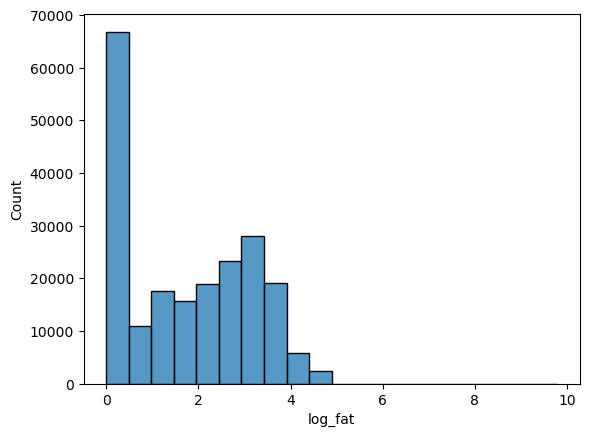

In [22]:
import numpy as np
df['log_fat'] = np.log1p(df['fat'])  # log(1 + fat)
sns.histplot(df['log_fat'], bins=20)
plt.show()


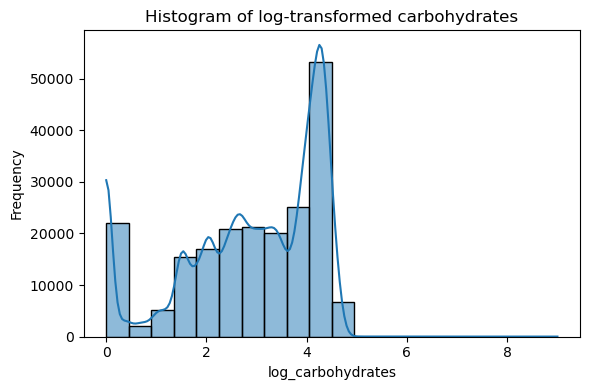

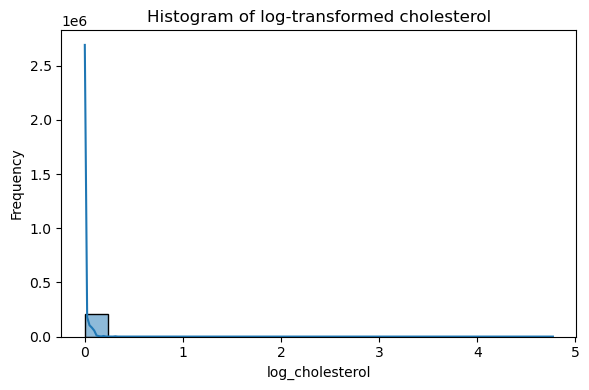

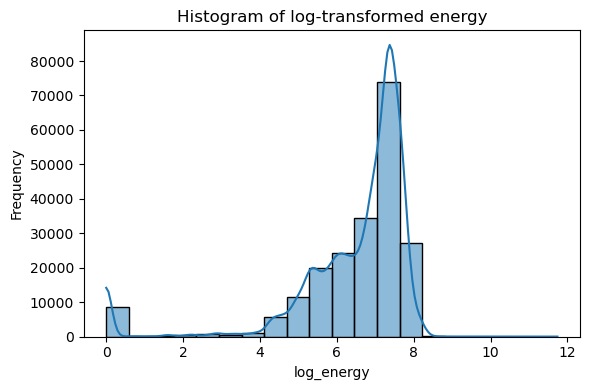

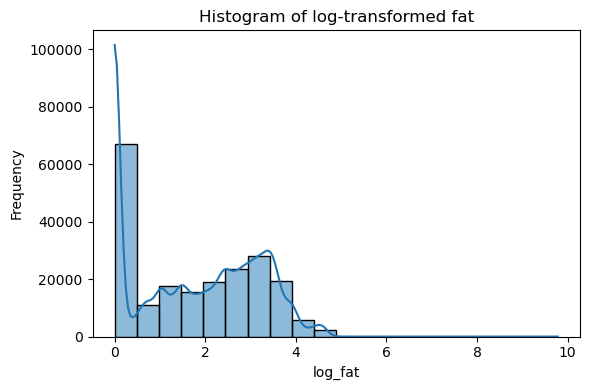

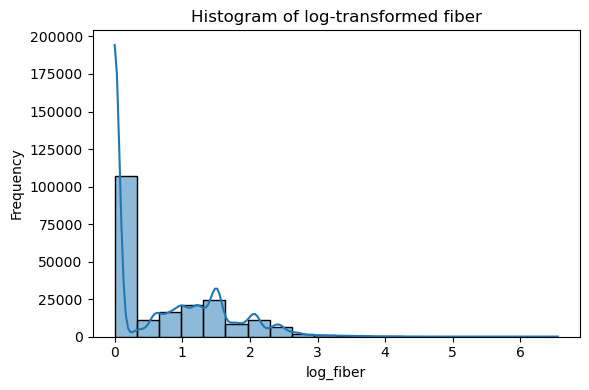

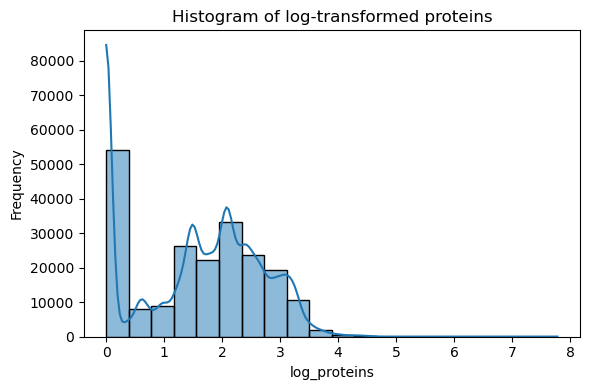

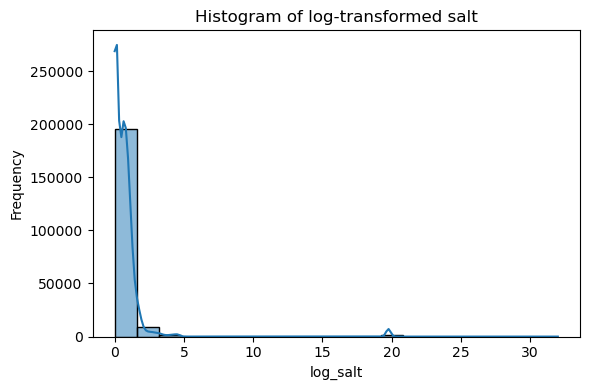

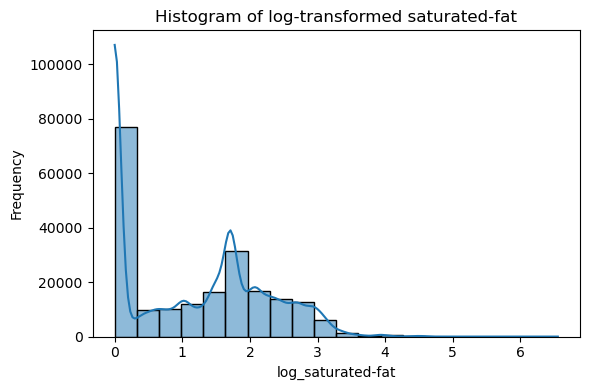

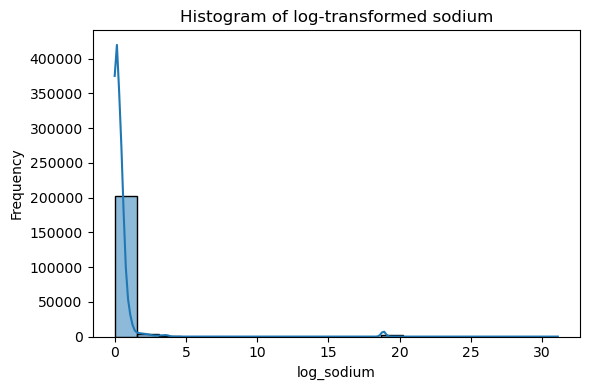

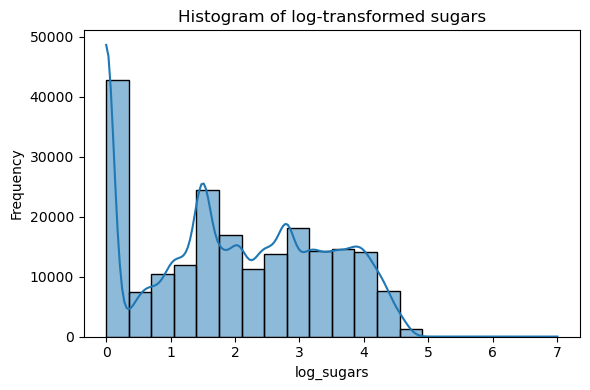

C:\Users\navee\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\navee\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


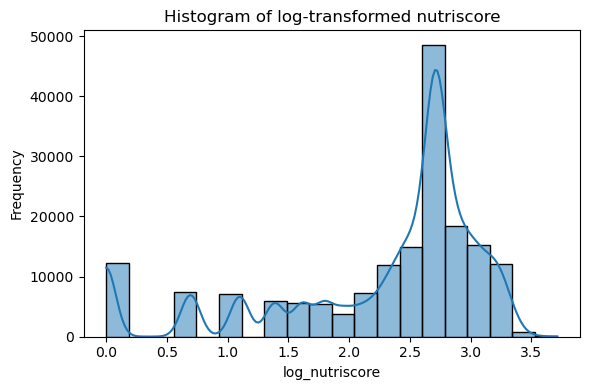

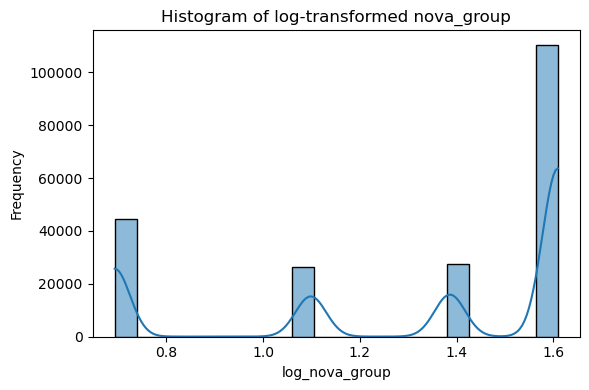

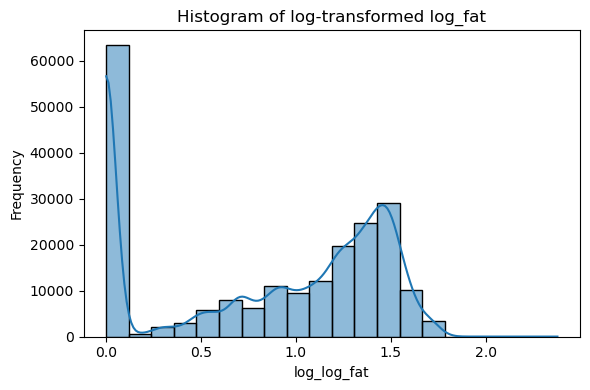

In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    df[f'log_{col}'] = np.log1p(df[col])  # log(1 + x) to avoid log(0)
    sns.histplot(df[f'log_{col}'], bins=20, kde=True)
    plt.title(f'Histogram of log-transformed {col}')
    plt.xlabel(f'log_{col}')
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [24]:
df.columns

Index(['carbohydrates', 'cholesterol', 'energy', 'fat', 'fiber', 'proteins',
       'salt', 'saturated-fat', 'sodium', 'sugars', 'nutriscore', 'nova_group',
       'log_fat', 'log_carbohydrates', 'log_cholesterol', 'log_energy',
       'log_fiber', 'log_proteins', 'log_salt', 'log_saturated-fat',
       'log_sodium', 'log_sugars', 'log_nutriscore', 'log_nova_group',
       'log_log_fat'],
      dtype='object')

In [25]:
df = df.iloc[:,:12]

In [26]:
# Detecting outliers
Q1 = df['carbohydrates'].quantile(0.25)
Q3 = df['carbohydrates'].quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for outliers
outliers = (df['carbohydrates'] < (Q1 - 1.5 * IQR)) | (df['carbohydrates'] > (Q3 + 1.5 * IQR))
df[outliers]  # Show outlier rows


,carbohydrates,cholesterol,energy,fat,fiber,proteins,salt,saturated-fat,sodium,sugars,nutriscore,nova_group
259,506.0000,0.0000,255.0,0.800000,5.40000,5.100000,5.000000e-02,0.100000,2.000000e-02,0.900000,-8.0,1.0
320,300.0000,1.0000,33472.0,0.000000,200.00000,1500.000000,1.875000e+01,0.000000,7.500000e+00,0.000000,15.0,4.0
1882,306.0000,0.0000,1460.0,14.400000,66.50000,90.000000,1.380000e+00,1.900000,5.500000e-01,236.000000,6.0,3.0
4906,1000.0000,21.5000,92048.0,1600.000000,0.00000,1400.000000,1.325000e+02,700.000000,5.300000e+01,300.000000,40.0,4.0
15118,300.0000,0.0000,5860.0,0.000000,60.00000,50.000000,2.250000e+00,0.000000,9.000000e-01,0.000000,-4.0,1.0
15162,172.0000,0.0000,315.0,0.500000,0.60000,0.500000,1.000000e-02,0.100000,4.000000e-03,14.500000,1.0,2.0
17562,194.0000,0.0000,1430.0,2.630000,0.00000,20.800000,1.370000e+00,0.000000,5.470000e-01,41.600000,14.0,4.0
20542,238.0000,0.0000,420.0,0.000000,0.00000,47.600000,0.000000e+00,0.000000,0.000000e+00,190.000000,11.0,4.0
43156,226.0000,0.0586,1670.0,71.300000,0.00000,35.700000,7.650000e+00,17.800000,3.060000e+00,0.000000,24.0,4.0
45759,385.0000,0.0000,8040.0,12.000000,19.50000,59.000000,1.050000e+01,6.500000,4.200000e+00,16.000000,24.0,4.0


In [27]:
df.carbohydrates.mean()

33.50464773271792

In [28]:
# Handling outliers for all columns
for col in df.select_dtypes(include= [np.number]).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    # Option 1: Remove rows with outliers in this column
    # df = df[(df[col] >= lower) & (df[col] <= upper)]
    
    # Option 2: Cap values (uncomment below if you prefer this instead)
    df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower, df[col]))


In [29]:
# Detecting outliers
Q1 = df['carbohydrates'].quantile(0.25)
Q3 = df['carbohydrates'].quantile(0.75)
IQR = Q3 - Q1

# Boolean mask for outliers
outliers = (df['carbohydrates'] < (Q1 - 1.5 * IQR)) | (df['carbohydrates'] > (Q3 + 1.5 * IQR))
df[outliers]  # Show outlier rows

,carbohydrates,cholesterol,energy,fat,fiber,proteins,salt,saturated-fat,sodium,sugars,nutriscore,nova_group


### Correlation
Correlation: Correlation is a statistical measure that expresses how strongly two variables are related. In data analysis, correlation helps you understand relationships between numerical features. 
A correlation matrix is a table showing correlation coefficients between multiple variables (usually numerical features) in a dataset.

Each cell in the table shows the strength and direction of the relationship between two variables.

✅ Why It’s Useful:
Helps identify highly related variables (positive or negative).

Useful for feature selection and multicollinearity detection in machine learning.

Helps understand data patterns.

In [31]:
correlation_matrix = df.corr()
print(correlation_matrix)

               carbohydrates  cholesterol    energy       fat     fiber  \
carbohydrates       1.000000    -0.240400  0.514731 -0.050655  0.321064   
cholesterol        -0.240400     1.000000  0.052873  0.228374 -0.210331   
energy              0.514731     0.052873  1.000000  0.766807  0.344571   
fat                -0.050655     0.228374  0.766807  1.000000  0.216468   
fiber               0.321064    -0.210331  0.344571  0.216468  1.000000   
proteins           -0.110385     0.350396  0.315950  0.383263  0.241519   
salt               -0.099607     0.122591  0.076827  0.141823 -0.041840   
saturated-fat      -0.043973     0.359087  0.560285  0.745400 -0.028555   
sodium             -0.099606     0.122590  0.076825  0.141822 -0.041840   
sugars              0.648591    -0.091934  0.314931 -0.023793 -0.013016   
nutriscore          0.282774     0.226470  0.496851  0.445084 -0.212432   
nova_group          0.290773     0.182169  0.443497  0.357728 -0.191726   

               proteins 

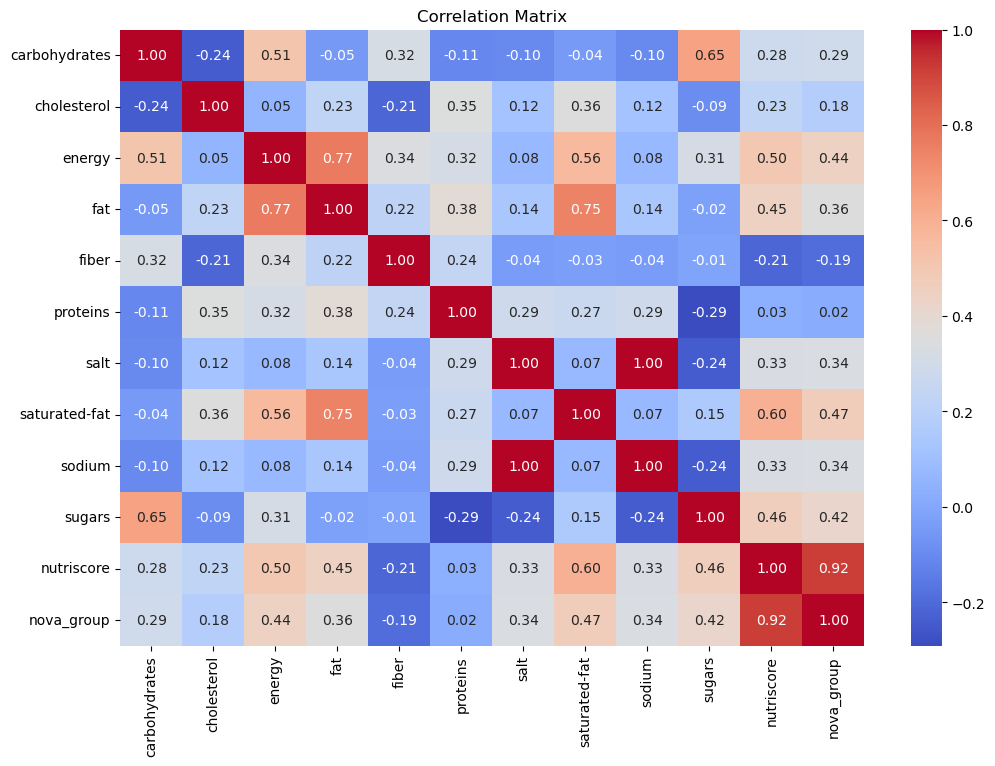

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


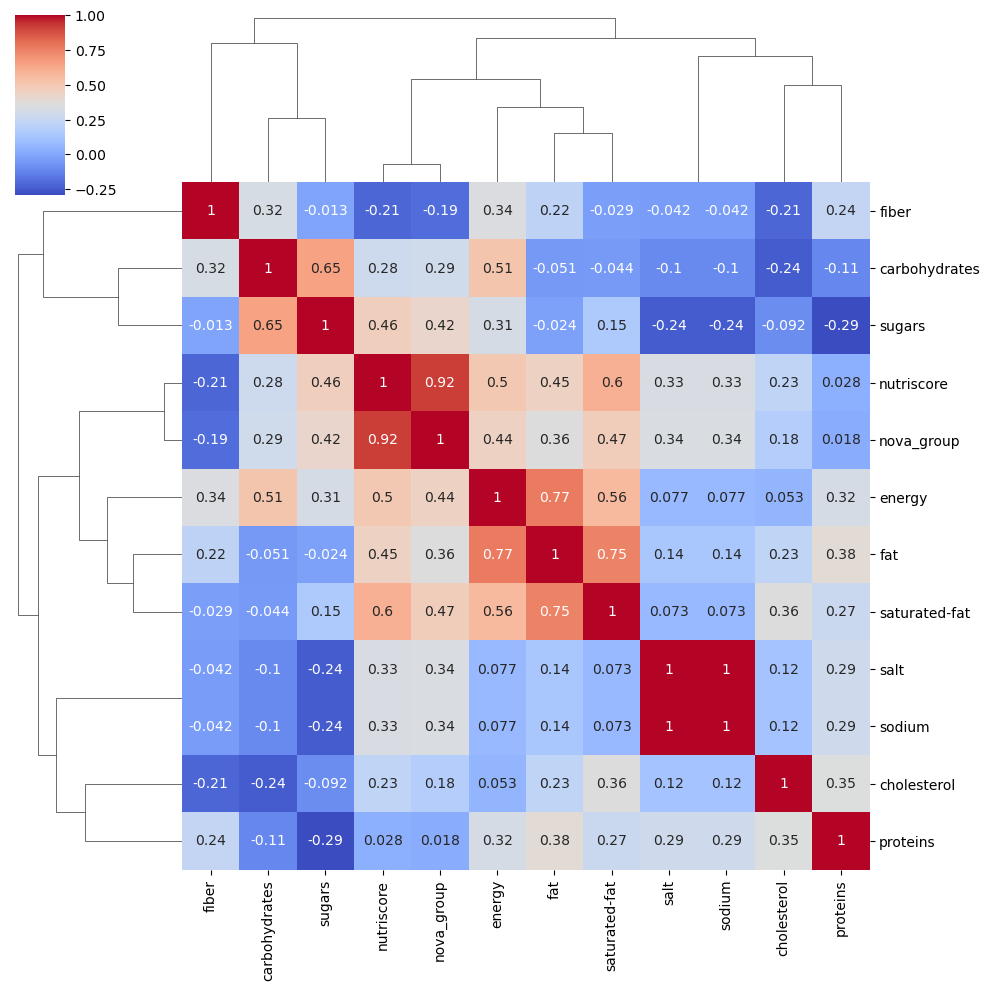

In [33]:
sns.clustermap(df.corr(), annot=True, cmap='coolwarm')

In [ ]:
# Class distribution

In [60]:
# Class counts
print(df['nova_group'].value_counts())

# Class percentages
print(df['nova_group'].value_counts(normalize=True) * 100)


nova_group
4.0    110398
1.0     44555
3.0     27551
2.0     26385
Name: count, dtype: int64
nova_group
4.0    52.850078
1.0    21.329510
3.0    13.189301
2.0    12.631110
Name: proportion, dtype: float64


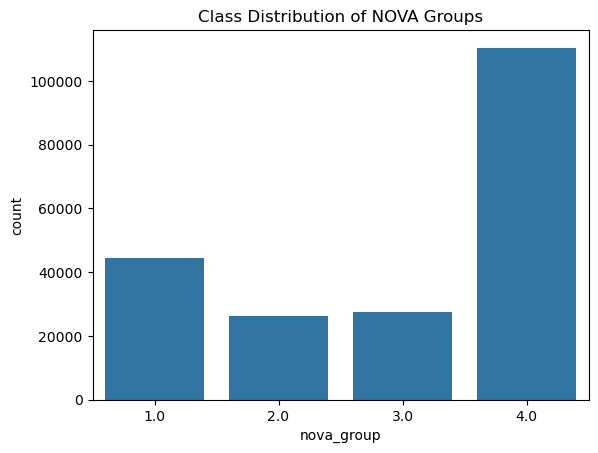

In [64]:
sns.countplot(data=df, x='nova_group')
plt.title('Class Distribution of NOVA Groups')
plt.show()


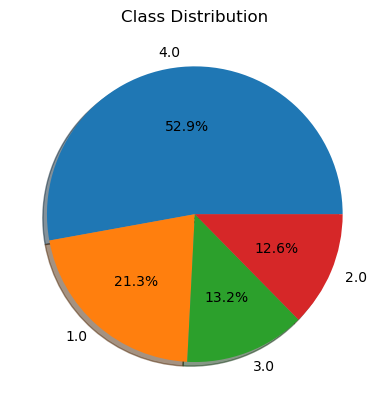

In [66]:
df['nova_group'].value_counts().plot.pie(autopct='%1.1f%%', shadow=True)
plt.title('Class Distribution')
plt.ylabel('')
plt.show()


### Interpretation:
Class 4.0 dominates the dataset with more than half (52.85%) of the samples.

Classes 2.0 and 3.0 each have only ~12–13% of the total.

Class 1.0 is somewhat better but still not equal to 4.0.

Since class 4.0 heavily outweighs the others—especially 2.0 and 3.0, which are well below 20%—the dataset is clearly imbalanced.

 Next Step:
I should apply class imbalance handling techniques like:

-Oversampling the minority classes (e.g., with SMOTE)

-Undersampling the majority class

-Using class weights in my models

In [70]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [72]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [88]:
X = df.iloc[:,:-1]
X

,carbohydrates,cholesterol,energy,fat,fiber,proteins,salt,saturated-fat,sodium,sugars,nutriscore
0,3.90,0.0,238.0,0.2,0.0,10.0,0.0900,0.100000,0.0360,3.900000,-5.0
1,29.00,0.0,936.0,8.2,0.0,5.1,3.6895,2.200000,1.4758,22.000000,18.0
2,15.50,0.0,264.0,0.0,0.0,0.2,0.0000,0.000000,0.0000,15.500000,9.0
3,5.30,0.0,134.0,0.3,0.0,0.9,0.4200,0.100000,0.1680,3.900000,-4.0
4,30.30,0.0,916.0,5.9,2.8,9.7,0.4640,0.500000,0.1856,1.700000,14.0
...,...,...,...,...,...,...,...,...,...,...,...
208884,80.95,0.0,1197.0,0.0,0.0,0.0,0.0000,4.508496,0.0000,53.764286,13.0
208885,100.00,0.0,1674.0,0.0,0.0,0.0,3.6895,4.508496,1.4758,53.764286,14.0
208886,80.95,0.0,1197.0,0.0,0.0,0.0,3.6895,4.508496,1.4758,53.764286,5.0
208887,80.95,0.0,1197.0,0.0,0.0,0.0,3.6895,4.508496,1.4758,53.764286,5.0


In [90]:
y=df.iloc[:,-1]
y

0         1.0
1         4.0
2         3.0
3         1.0
4         4.0
         ... 
208884    4.0
208885    4.0
208886    2.0
208887    2.0
208888    4.0
Name: nova_group, Length: 208889, dtype: float64

In [92]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply smote on training data set
why Only on Training Data?
Oversampling should be done only on training data to prevent leaking synthetic data into test data, which would inflate model performance artificially.

When you apply SMOTE (Synthetic Minority Over-sampling Technique), it creates synthetic samples for minority classes, which increases the size of your training dataset. This can lead to:
Longer training time
More memory usage
Slower model execution, especially with complex models like SVM or Gradient Boosting



In [98]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [99]:
import pandas as pd
print(pd.Series(y_train_resampled).value_counts())


nova_group
4.0    88381
1.0    88381
3.0    88381
2.0    88381
Name: count, dtype: int64


In [102]:
import pandas as pd

# Combine resampled X and y into a DataFrame
resampled_df = pd.concat([pd.DataFrame(X_train_resampled), pd.Series(y_train_resampled, name='nova_group')], axis=1)

# Save to new CSV
resampled_df.to_csv('C:/Users/navee/MTP/resampled_training_data.csv', index=False)